<a href="https://colab.research.google.com/github/rehanmehdichandio/Zomato_Analysis/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Data Analysis**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Zomato data .csv')

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.columns   #listed all the columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [6]:
df.info()   #gave the basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
df.describe()    #describes the basic mathematical calculations

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
df.isnull().sum()  #sums all the null values in each column

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [9]:
#Convert the data type of column rate

def handleRate(value):
  value = str(value).split('/')
  value=value[0]
  return float(value)

df['rate'] = df['rate'].apply(handleRate)

print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [24]:
df['listed_in(type)'].unique()  #prints all the unique values in the column

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

# Countplot

Text(0.5, 0, 'Type of Label')

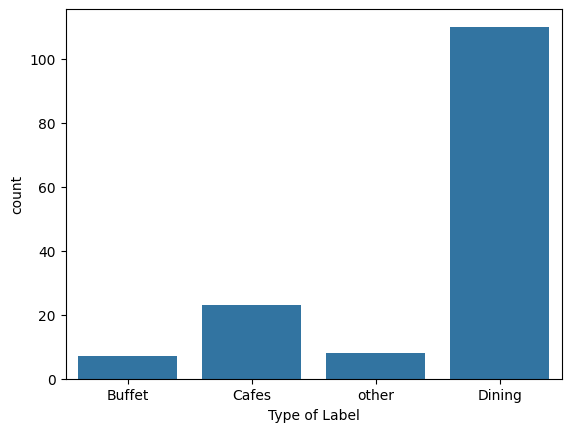

In [12]:
sns.countplot(data=df, x='listed_in(type)')
plt.xlabel('Type of Label')

# **Line Plot**

Text(0, 0.5, 'votes')

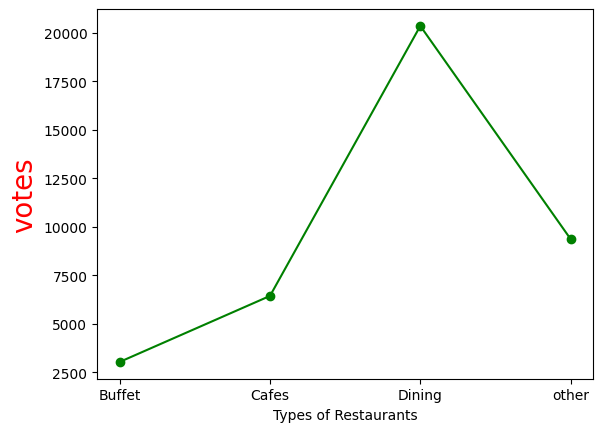

In [14]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker= 'o')
plt.xlabel('Types of Restaurants')
plt.ylabel('votes', c='red', size=20)

In [18]:
avg_rest_type = df.groupby('listed_in(type)')['rate'].mean()

In [19]:
result1 = pd.DataFrame({'rate': avg_rest_type})

Text(0, 0.5, 'Average Ratings')

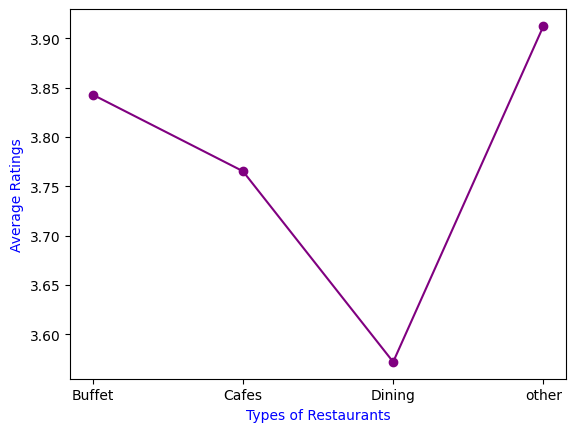

In [27]:
plt.plot(result1, c='purple', marker = 'o')
plt.xlabel('Types of Restaurants', c='blue')
plt.ylabel('Average Ratings', c='blue')

# Range of Ratings given by People

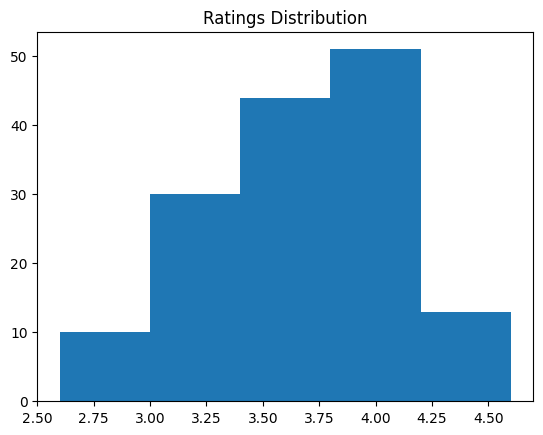

In [29]:
plt.hist(df['rate'], bins=5)
plt.title('Ratings Distribution')
plt.show()

In [30]:
df['approx_cost(for two people)'].mean()

418.2432432432432

# **Bar Plot**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

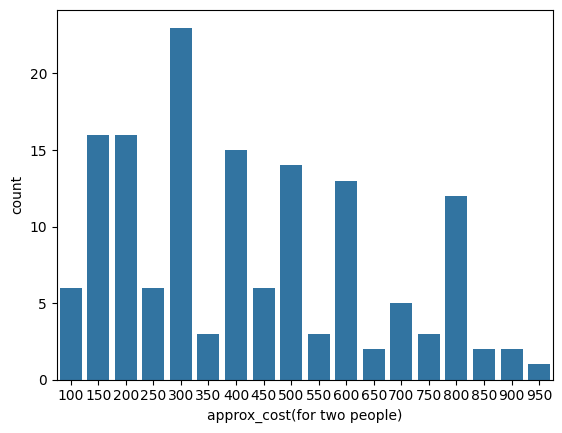

In [42]:
sns.countplot(data=df, x='approx_cost(for two people)')


# **Box Plot**

<Axes: xlabel='online_order', ylabel='rate'>

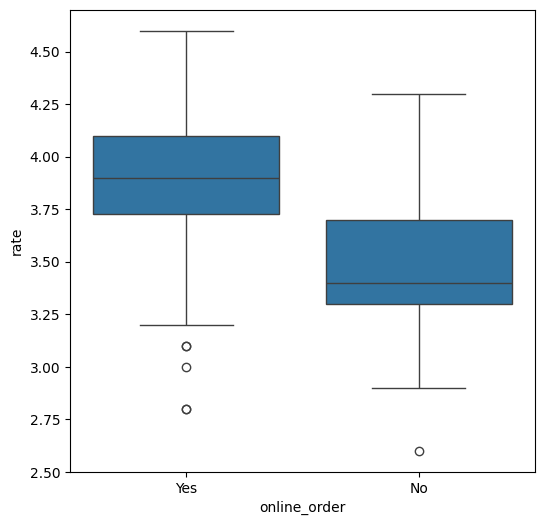

In [43]:
#Which mode recieves more rating
plt.figure(figsize= (6,6))
sns.boxplot(data=df, x='online_order', y='rate')

In [48]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# **Heat Map**

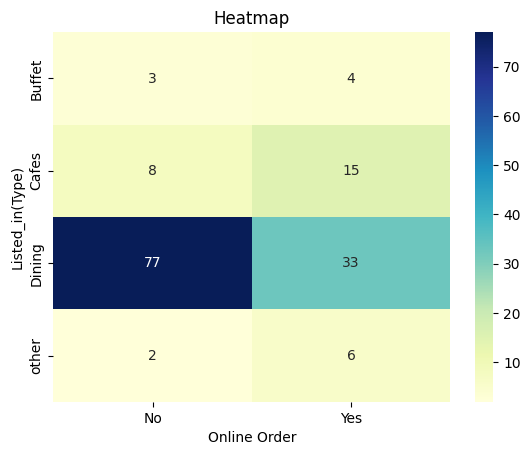

In [47]:
pivot_table = df.pivot_table(index='listed_in(type)', columns= 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt ='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed_in(Type)')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')